In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print('ship modes:', df['Ship Mode'].unique())
print('segments:', df['Segment'].unique())
print('countries:', len(df['Country'].unique()))
print('cities:', len(df['City'].unique()))
print('states:', len(df['State'].unique()))
print('categories:', df['Category'].unique())
print('categories:', df['Sub-Category'].unique()[:5])



ship modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
segments: ['Consumer' 'Corporate' 'Home Office']
countries: 1
cities: 531
states: 49
categories: ['Furniture' 'Office Supplies' 'Technology']
categories: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage']


In [5]:
shipments = df.drop(['Country', 'City', 'State'], axis='columns')

In [6]:
shipments.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
shipments.isna().sum()

Ship Mode       0
Segment         0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

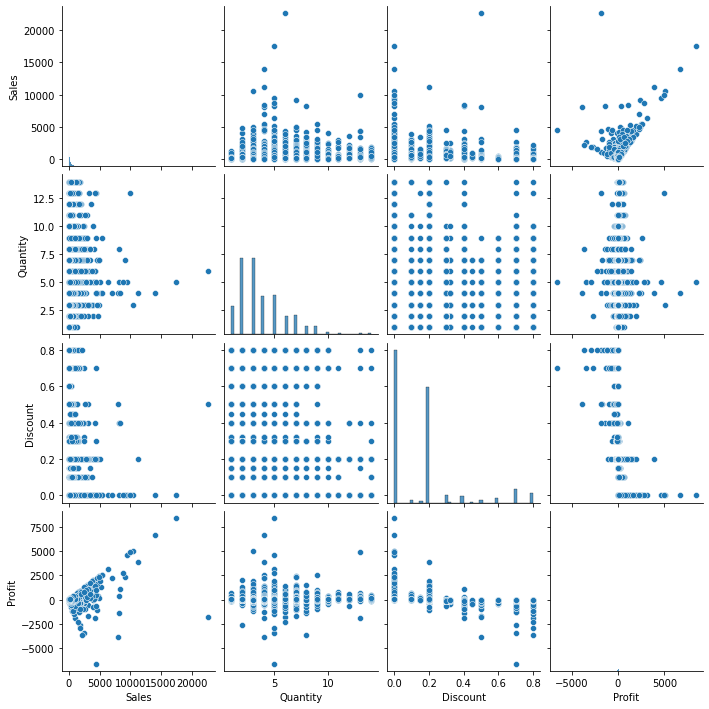

In [8]:
sns.pairplot(shipments.drop('Postal Code', axis=1))

In [9]:
# shipments.drop('Quantity', axis=1, inplace=True)

In [10]:
# sales_iqr = shipments.Sales.quantile(.75) - shipments.Sales.quantile(.25)
# thresh = sales_iqr*20
# print(thresh)
# shipments[np.logical_and(shipments.Sales>thresh, shipments['Sub-Category']=='Machines')]

<AxesSubplot:>

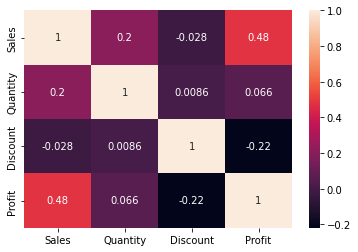

In [11]:
corrs = shipments.drop('Postal Code', axis=1).corr()
sns.heatmap(corrs, annot=True)

In [12]:
shipments[shipments['Sub-Category'].isin(shipments['Sub-Category'].unique()[0:1])]

,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
27,Standard Class,Consumer,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
38,Standard Class,Home Office,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
189,First Class,Home Office,10035,East,Furniture,Bookcases,899.1360,4,0.20,112.3920
192,First Class,Home Office,10035,East,Furniture,Bookcases,626.3520,3,0.20,46.9764
...,...,...,...,...,...,...,...,...,...,...
9741,Standard Class,Corporate,5408,East,Furniture,Bookcases,4404.9000,5,0.00,1013.1270
9769,Standard Class,Home Office,33012,South,Furniture,Bookcases,339.9200,5,0.20,8.4980
9787,Standard Class,Consumer,77070,Central,Furniture,Bookcases,1023.3320,5,0.32,-30.0980
9931,Standard Class,Consumer,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960


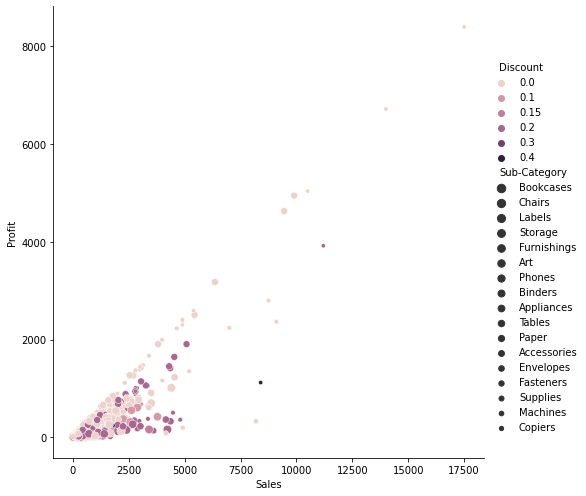

In [13]:
sns.relplot(x='Sales', y='Profit', hue='Discount', size='Sub-Category', data=shipments[shipments['Profit']>0], height=7)

(-4000.0, 4000.0)

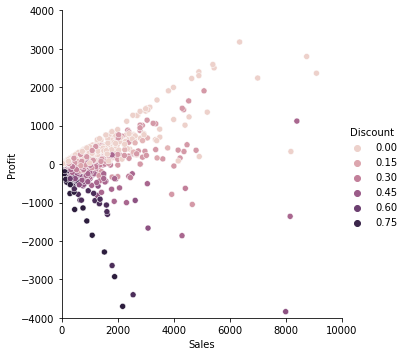

In [14]:
sns.relplot(x = 'Sales', y='Profit', hue='Discount', data= shipments)
plt.xlim(0,10000)
plt.ylim(-4000,4000)

(-4000.0, 4000.0)

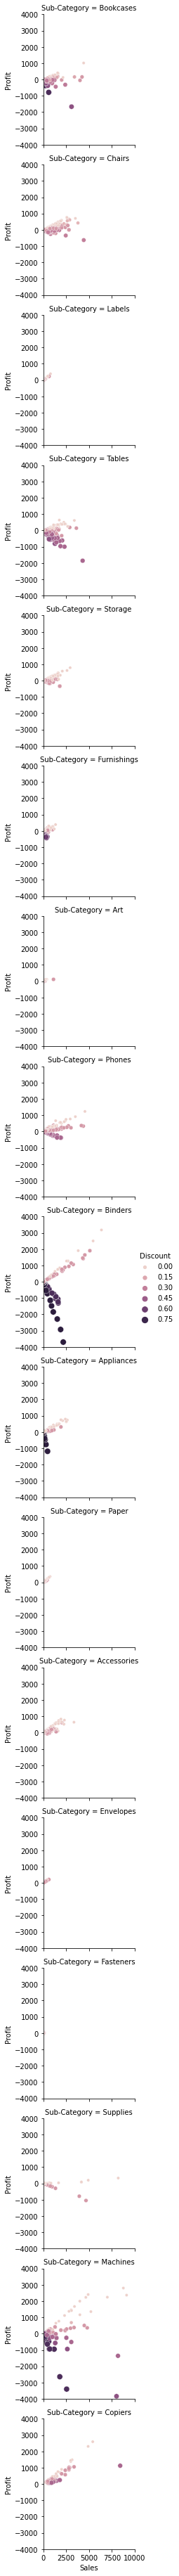

In [15]:
sns.relplot(x='Sales', y='Profit', row='Sub-Category',size='Discount', hue='Discount', data=shipments, height=3)
plt.xlim(0,10000)
plt.ylim(-4000,4000)

In [16]:
temp = shipments
temp['DiscountedSales'] = temp.apply(lambda x: x.Sales - (x.Sales*x.Discount), axis=1)
temp.corr()['Profit']

Postal Code       -0.029961
Sales              0.479064
Quantity           0.066253
Discount          -0.219487
Profit             1.000000
DiscountedSales    0.632732
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

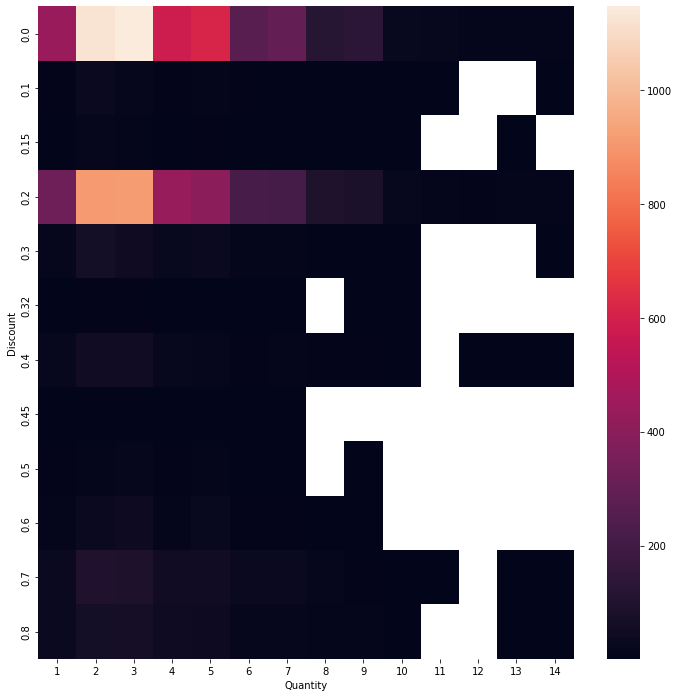

In [17]:
x = shipments.groupby(['Discount', 'Quantity']).size()
plt.figure(figsize=(12,12))
sns.heatmap(x.unstack('Quantity'))

<AxesSubplot:xlabel='Discount', ylabel='Quantity'>

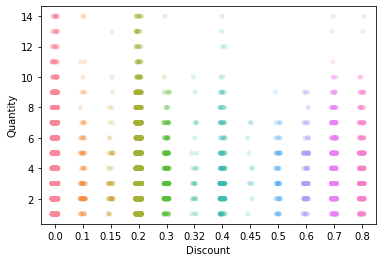

In [18]:
sns.stripplot(x='Discount', y='Quantity', data=shipments, alpha=0.2)

In [72]:
spr = shipments[['Region','Sales', 'Profit']].groupby('Region')
spr = spr.agg('sum')
spr

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


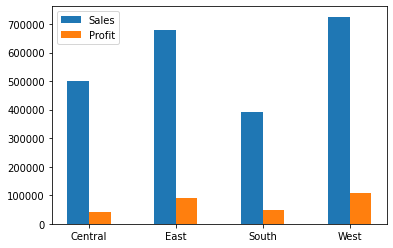

In [78]:
r = np.arange(4)
r*=2
plt.bar(r, spr.Sales, label='Sales', width = 0.5)
plt.bar(r+0.5, spr.Profit, label='Profit', width = 0.5)

plt.xticks(r+0.5/2, spr.index)
plt.legend()

# Conclusions


<li>For every discount value in each subcategory, the relationship between Sales and Profit is almost linear</li>
<li>There is no clear relationship between discount amount and the quantity of items sold</li>
<li>There is no clear relationship between discount amount and the value of sales</li>

Therefore, in order to increase profits, the companies must reduce their discount amount.
Companies could also sell different types of products with a low discount, like Copiers, Machines, Accessories, and Binders.
